In [1]:
using Distributions

In [2]:
using Plots
pyplot()

In [66]:
d_names = names(Distributions)
startsWithCapital(s) = ismatch(r"^[A-Z].*$", string(s))
d_names = filter(s -> startsWithCapital(s), d_names);

124-element Array{Symbol,1}:
 :AbstractMixtureModel             
 :AbstractMvNormal                 
 :Arcsine                          
 :Bernoulli                        
 :Beta                             
 :BetaBinomial                     
 :BetaPrime                        
 :Binomial                         
 :Biweight                         
 :Categorical                      
 :Cauchy                           
 :Chi                              
 :Chisq                            
 ⋮                                 
 :VariateForm                      
 :VonMises                         
 :VonMisesFisher                   
 :WalleniusNoncentralHypergeometric
 :Weibull                          
 :Wishart                          
 :ZeroMeanDiagNormal               
 :ZeroMeanDiagNormalCanon          
 :ZeroMeanFullNormal               
 :ZeroMeanFullNormalCanon          
 :ZeroMeanIsoNormal                
 :ZeroMeanIsoNormalCanon           

In [4]:
using StatPlots

Could not create a default Distributions.AbstractMixtureModel{VF<:Distributions.VariateForm,VS<:Distributions.ValueSupport,C<:Distributions.Distribution}: MethodError(Distributions.AbstractMixtureModel{VF<:Distributions.VariateForm,VS<:Distributions.ValueSupport,C<:Distributions.Distribution},()).
Could not create a default Distributions.AbstractMvNormal: MethodError(Distributions.AbstractMvNormal,()).



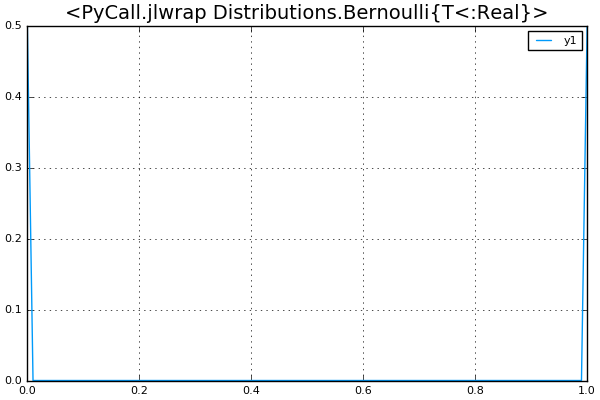


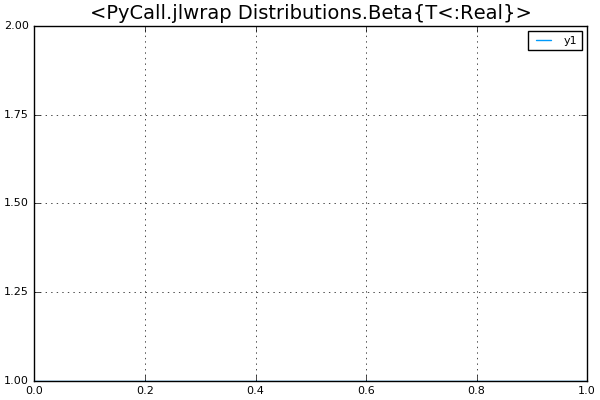

Could not plot the default Distributions.Arcsine{T<:Real}: PyError (:PyObject_Call) <type 'exceptions.RuntimeError'>
RuntimeError(u'Cannot get window extent w/o renderer',)
  File "/Users/cmey/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/text.py", line 959, in get_window_extent
    raise RuntimeError('Cannot get window extent w/o renderer')
.
:PyObject_Call.



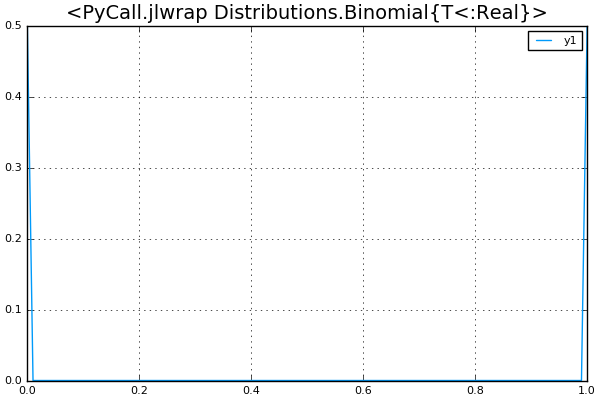


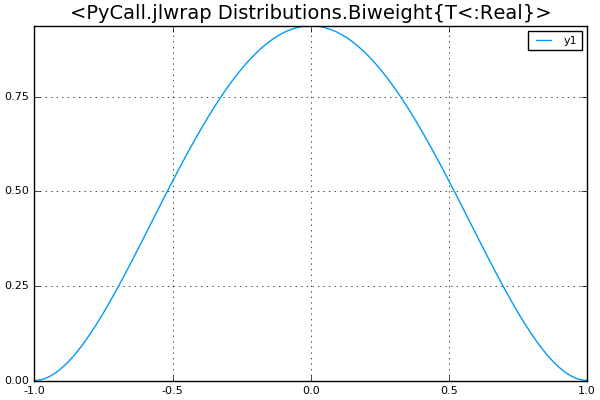

Could not create a default Distributions.BetaBinomial{T<:Real}: MethodError(Distributions.BetaBinomial{T<:Real},()).
Could not plot the default Distributions.BetaPrime{T<:Real}: DivideError().



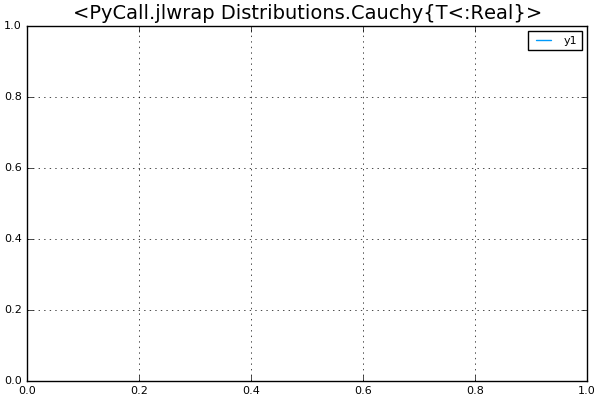

Could not create a default Distributions.Categorical{T<:Real}: MethodError(Distributions.Categorical{T<:Real},()).



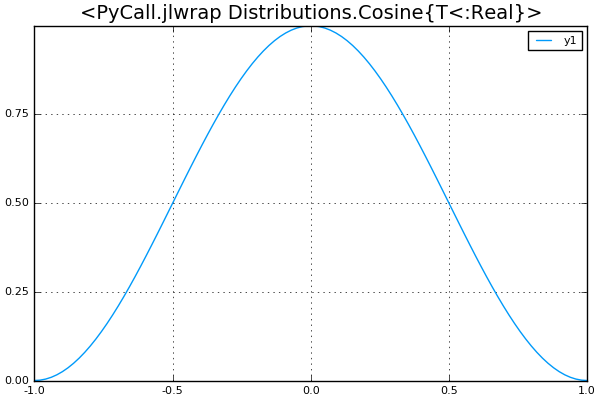

Could not create a default Distributions.Chi{T<:Real}: MethodError(Distributions.Chi{T<:Real},()).
Could not create a default Distributions.Chisq{T<:Real}: MethodError(Distributions.Chisq{T<:Real},()).
Could not plot the default Distributions.Continuous: ErrorException("In convertToAnyVector, could not handle the argument types: (Distributions.Continuous,)").
In convertToAnyVector, could not handle the argument types: (Distributions.Continuous,).
Could not create a default Distributions.Distribution{F<:Distributions.VariateForm,Distributions.Continuous}: MethodError(Distributions.Distribution{F<:Distributions.VariateForm,Distributions.Continuous},()).
Could not create a default Distributions.Distribution{Distributions.Matrixvariate,Distributions.Continuous}: MethodError(Distributions.Distribution{Distributions.Matrixvariate,Distributions.Continuous},()).
Could not create a default Distributions.Distribution{Distributions.Multivariate,Distributions.Continuous}: MethodError(Distributions


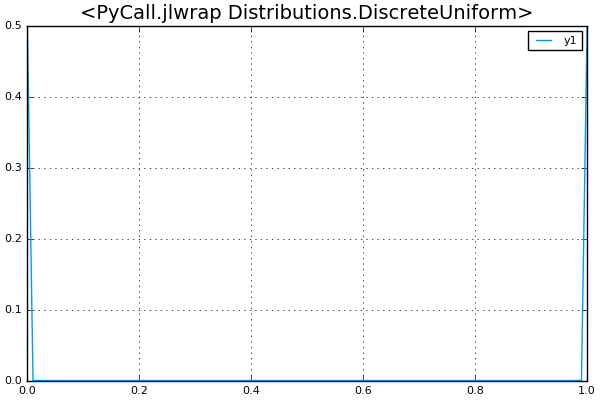

Could not create a default Distributions.MvNormal{Float64,PDMats.PDiagMat{Float64,Array{Float64,1}},Array{Float64,1}}: MethodError(Distributions.MvNormal{Float64,PDMats.PDiagMat{Float64,Array{Float64,1}},Array{Float64,1}},()).
Could not create a default Distributions.MvNormalCanon{Float64,PDMats.PDiagMat{Float64,Array{Float64,1}},Array{Float64,1}}: MethodError(Distributions.MvNormalCanon{Float64,PDMats.PDiagMat{Float64,Array{Float64,1}},Array{Float64,1}},()).
Could not create a default Distributions.Dirichlet{T<:Real}: MethodError(Distributions.Dirichlet{T<:Real},()).
Could not plot the default Distributions.Discrete: ErrorException("In convertToAnyVector, could not handle the argument types: (Distributions.Discrete,)").
In convertToAnyVector, could not handle the argument types: (Distributions.Discrete,).
Could not create a default Distributions.Distribution{F<:Distributions.VariateForm,Distributions.Discrete}: MethodError(Distributions.Distribution{F<:Distributions.VariateForm,Distri


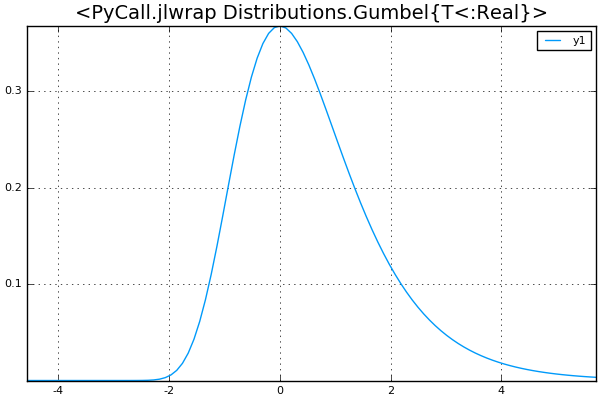

Could not create a default Distributions.Distribution{Distributions.Univariate,Distributions.Discrete}: MethodError(Distributions.Distribution{Distributions.Univariate,Distributions.Discrete},()).
Could not create a default Distributions.Distribution{F<:Distributions.VariateForm,S<:Distributions.ValueSupport}: MethodError(Distributions.Distribution{F<:Distributions.VariateForm,S<:Distributions.ValueSupport},()).
Could not create a default Distributions: MethodError(Distributions,()).



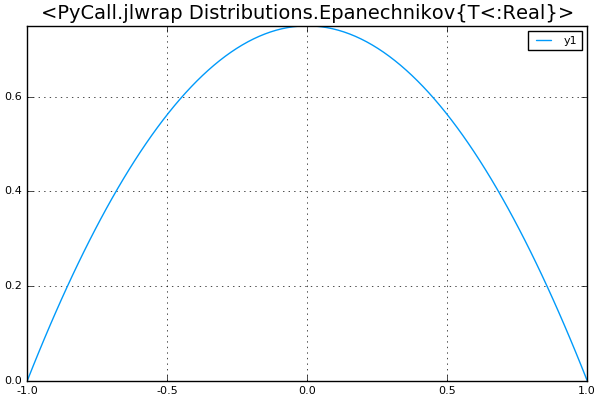

Could not create a default Distributions.EdgeworthMean{D<:Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport}}: MethodError(Distributions.EdgeworthMean{D<:Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport}},()).
Could not create a default Distributions.EdgeworthSum{D<:Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport}}: MethodError(Distributions.EdgeworthSum{D<:Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport}},()).
Could not create a default Distributions.EdgeworthZ{D<:Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport}}: MethodError(Distributions.EdgeworthZ{D<:Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport}},()).
Could not create a default Distributions.EmpiricalUnivariateDistribution: MethodError(Distributions.EmpiricalUnivariateDistribution,()).



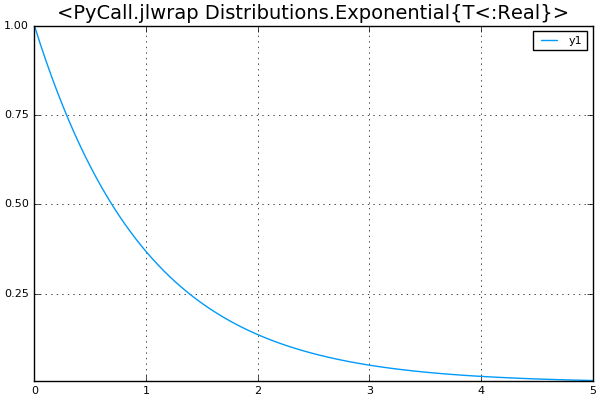

Could not create a default Distributions.Erlang{T<:Real}: MethodError(Distributions.Erlang{T<:Real},(1.0,1.0)).
Could not create a default Distributions.Estimator{D<:Distributions.Distribution}: MethodError(Distributions.Estimator{D<:Distributions.Distribution},()).



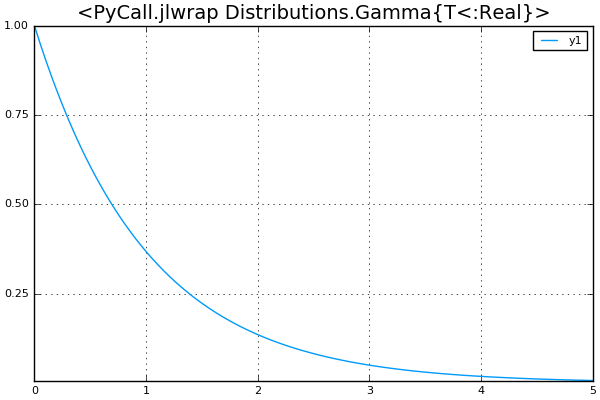

Could not create a default Distributions.FDist{T<:Real}: MethodError(Distributions.FDist{T<:Real},()).
Could not create a default Distributions.FisherNoncentralHypergeometric{T<:Real}: MethodError(Distributions.FisherNoncentralHypergeometric{T<:Real},()).
Could not plot the default Distributions.Frechet{T<:Real}: DivideError().
Could not create a default Distributions.MvNormal{Float64,PDMats.PDMat{Float64,Array{Float64,2}},Array{Float64,1}}: MethodError(Distributions.MvNormal{Float64,PDMats.PDMat{Float64,Array{Float64,2}},Array{Float64,1}},()).
Could not create a default Distributions.MvNormalCanon{Float64,PDMats.PDMat{Float64,Array{Float64,2}},Array{Float64,1}}: MethodError(Distributions.MvNormalCanon{Float64,PDMats.PDMat{Float64,Array{Float64,2}},Array{Float64,1}},()).



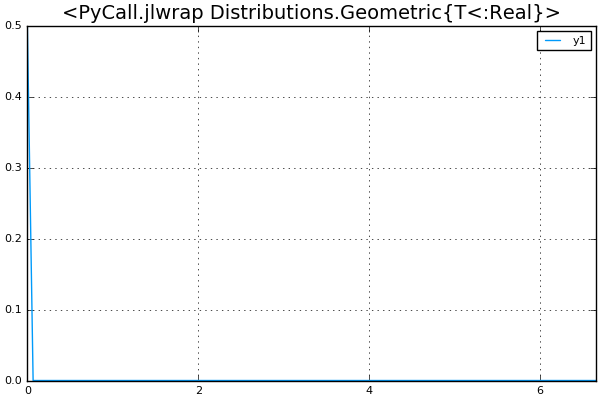


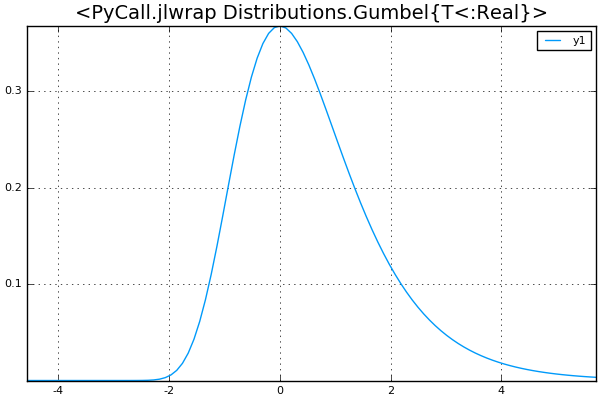

Could not create a default Distributions.GeneralizedExtremeValue{T<:Real}: MethodError(Distributions.GeneralizedExtremeValue{T<:Real},()).
Could not plot the default Distributions.GeneralizedPareto{T<:Real}: DivideError().



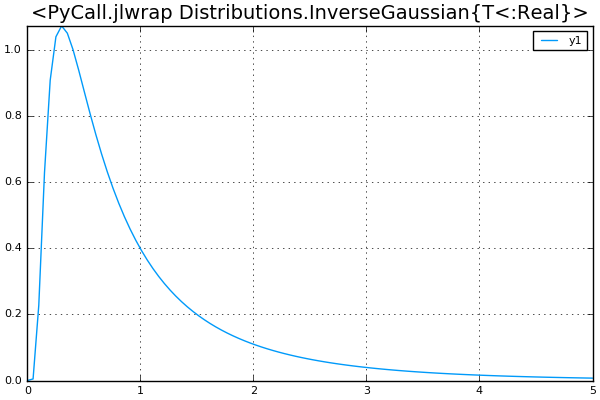

Could not create a default Distributions.Hypergeometric: MethodError(Distributions.Hypergeometric,()).
Could not plot the default Distributions.InverseGamma{T<:Real}: DivideError().



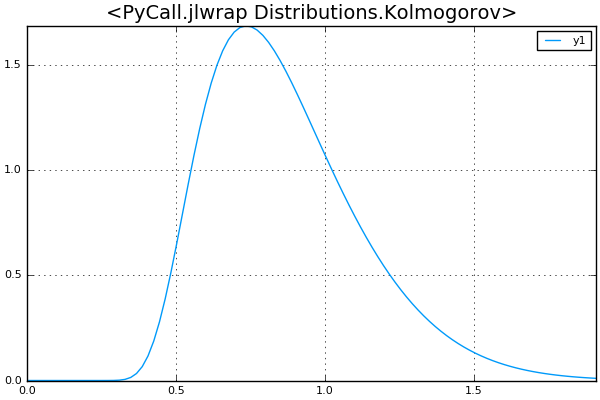


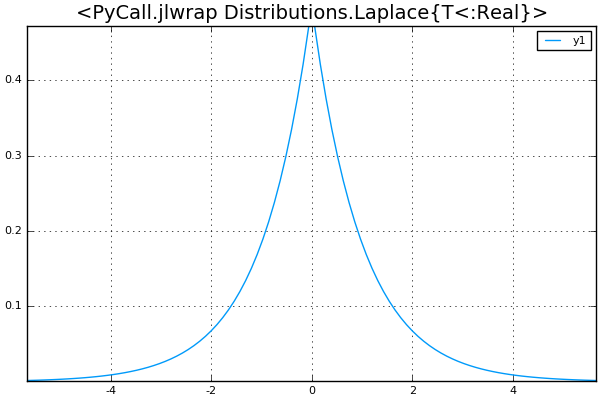

Could not create a default Distributions.InverseWishart{T<:Real,ST<:PDMats.AbstractPDMat}: MethodError(Distributions.InverseWishart{T<:Real,ST<:PDMats.AbstractPDMat},()).
Could not create a default Distributions.MvNormal{Float64,PDMats.ScalMat{Float64},Array{Float64,1}}: MethodError(Distributions.MvNormal{Float64,PDMats.ScalMat{Float64},Array{Float64,1}},()).
Could not create a default Distributions.MvNormalCanon{Float64,PDMats.ScalMat{Float64},Array{Float64,1}}: MethodError(Distributions.MvNormalCanon{Float64,PDMats.ScalMat{Float64},Array{Float64,1}},()).
Could not create a default Distributions.KSDist: MethodError(Distributions.KSDist,()).
Could not create a default Distributions.KSOneSided: MethodError(Distributions.KSOneSided,()).



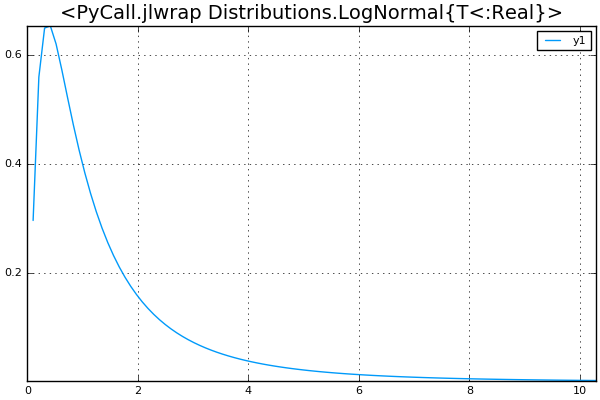


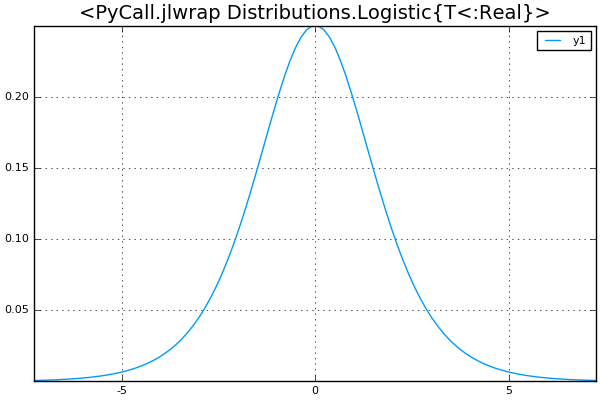

Could not plot the default Distributions.Levy{T<:Real}: DivideError().



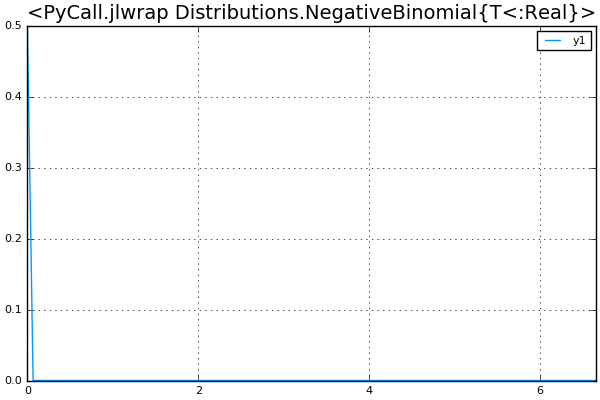

Could not create a default Distributions.MAPEstimator{D<:Distributions.Distribution,Pri}: MethodError(Distributions.MAPEstimator{D<:Distributions.Distribution,Pri},()).
Could not create a default Distributions.MLEstimator{D<:Distributions.Distribution}: MethodError(Distributions.MLEstimator{D<:Distributions.Distribution},()).
Could not create a default Distributions.Distribution{Distributions.Matrixvariate,S<:Distributions.ValueSupport}: MethodError(Distributions.Distribution{Distributions.Matrixvariate,S<:Distributions.ValueSupport},()).
Could not plot the default Distributions.Matrixvariate: ErrorException("In convertToAnyVector, could not handle the argument types: (Distributions.Matrixvariate,)").
In convertToAnyVector, could not handle the argument types: (Distributions.Matrixvariate,).
Could not create a default Distributions.MixtureModel{VF<:Distributions.VariateForm,VS<:Distributions.ValueSupport,C<:Distributions.Distribution}: MethodError(Distributions.MixtureModel{VF<:Distrib


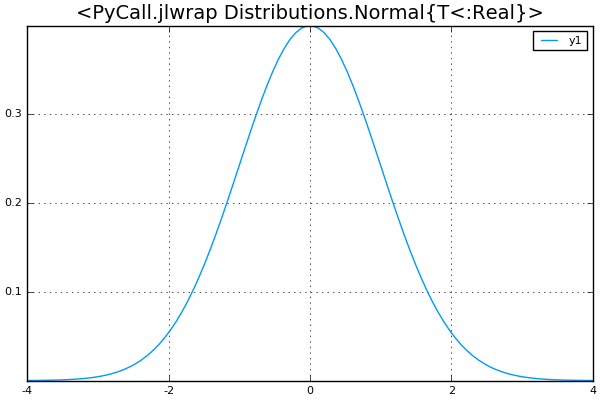


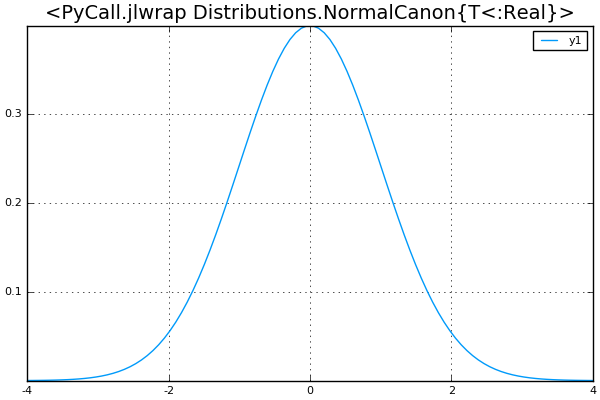

Could not create a default Union{Distributions.Distribution{Distributions.Multivariate,S<:Distributions.ValueSupport},Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport}}: MethodError(Union{Distributions.Distribution{Distributions.Multivariate,S<:Distributions.ValueSupport},Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport}},()).
Could not create a default Distributions.NoncentralBeta{T<:Real}: MethodError(Distributions.NoncentralBeta{T<:Real},()).
Could not create a default Distributions.NoncentralChisq{T<:Real}: MethodError(Distributions.NoncentralChisq{T<:Real},()).
Could not create a default Distributions.NoncentralF{T<:Real}: MethodError(Distributions.NoncentralF{T<:Real},()).
Could not create a default Distributions.NoncentralHypergeometric{T<:Real}: MethodError(Distributions.NoncentralHypergeometric{T<:Real},()).
Could not create a default Distributions.NoncentralT{T<:Real}: MethodError(Distributions.NoncentralT{T<:R


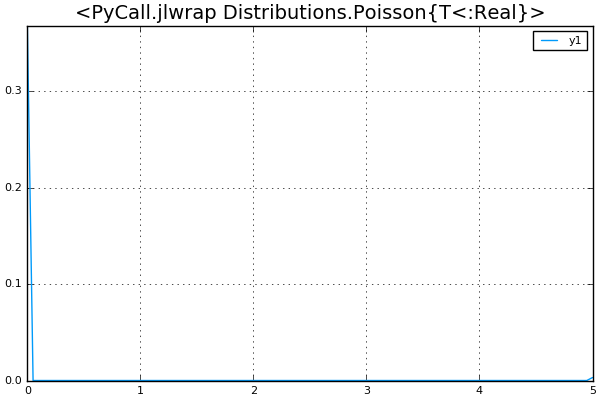

Could not plot the default Distributions.Pareto{T<:Real}: DivideError().



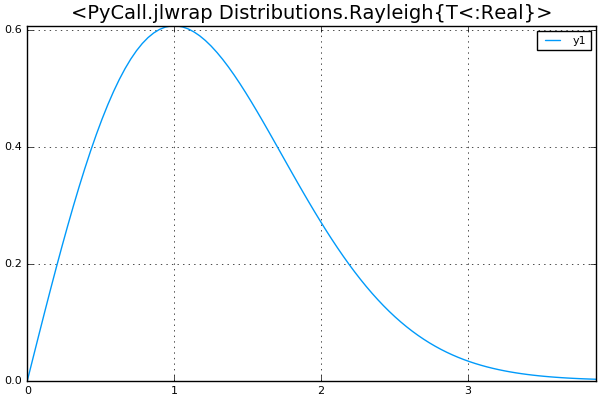

Could not create a default Distributions.PoissonBinomial{T<:Real}: MethodError(Distributions.PoissonBinomial{T<:Real},()).
Could not create a default Distributions.QQPair: MethodError(Distributions.QQPair,()).



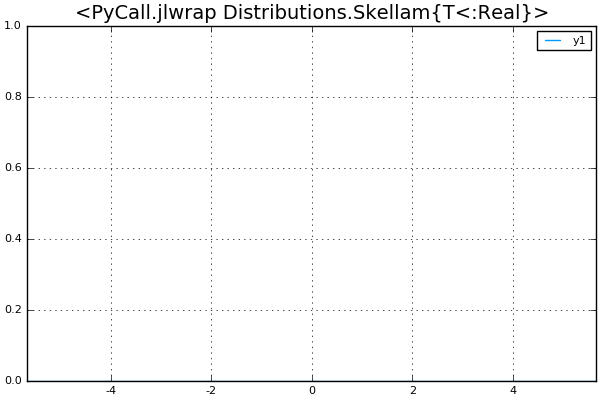

Could not create a default Distributions.RealInterval: MethodError(Distributions.RealInterval,()).
Could not create a default Distributions.Sampleable{F<:Distributions.VariateForm,S<:Distributions.ValueSupport}: MethodError(Distributions.Sampleable{F<:Distributions.VariateForm,S<:Distributions.ValueSupport},()).



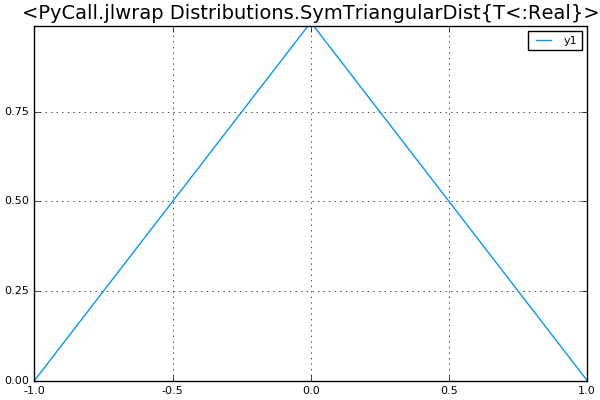

Could not create a default Distributions.SufficientStats: MethodError(Distributions.SufficientStats,()).



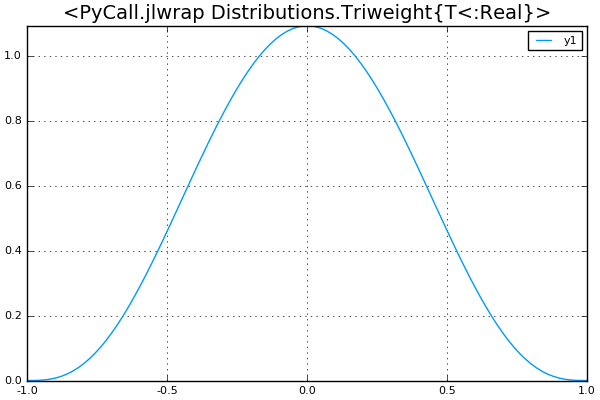

Could not create a default Distributions.TDist{T<:Real}: MethodError(Distributions.TDist{T<:Real},()).
Could not create a default Distributions.TriangularDist{T<:Real}: MethodError(Distributions.TriangularDist{T<:Real},()).



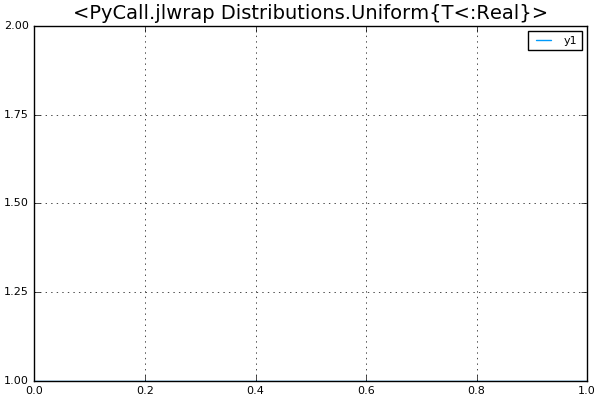

Could not create a default Distributions.Truncated{D<:Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},S<:Distributions.ValueSupport}: MethodError(Distributions.Truncated{D<:Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},S<:Distributions.ValueSupport},()).
Could not create a default Distributions.TruncatedNormal: MethodError(Distributions.TruncatedNormal,()).
Could not plot the default Distributions.Univariate: ErrorException("In convertToAnyVector, could not handle the argument types: (Distributions.Univariate,)").
In convertToAnyVector, could not handle the argument types: (Distributions.Univariate,).
Could not create a default Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport}: MethodError(Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},()).
Could not create a default Distributions.UnivariateGMM: MethodError(Distributions.UnivariateGMM,()).
Could n


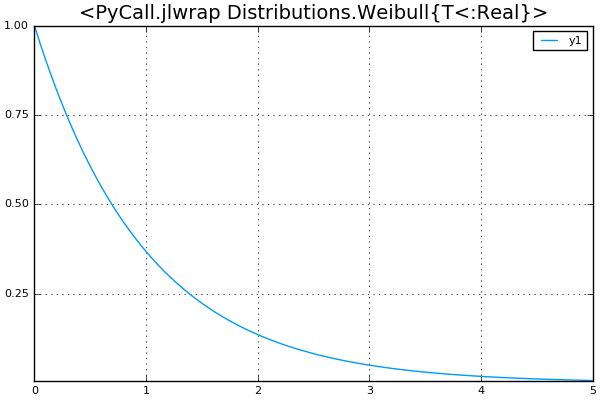

Could not plot the default Distributions.VonMises{T<:Real}: MethodError(start,(Distributions.VonMises{Float64}(μ=0.0, κ=1.0),)).
Could not create a default Distributions.VonMisesFisher{T<:Real}: MethodError(Distributions.VonMisesFisher{T<:Real},()).
Could not create a default Distributions.WalleniusNoncentralHypergeometric{T<:Real}: MethodError(Distributions.WalleniusNoncentralHypergeometric{T<:Real},()).
Could not create a default Distributions.Wishart{T<:Real,ST<:PDMats.AbstractPDMat}: MethodError(Distributions.Wishart{T<:Real,ST<:PDMats.AbstractPDMat},()).
Could not create a default Distributions.MvNormal{Float64,PDMats.PDiagMat{Float64,Array{Float64,1}},Distributions.ZeroVector{Float64}}: MethodError(Distributions.MvNormal{Float64,PDMats.PDiagMat{Float64,Array{Float64,1}},Distributions.ZeroVector{Float64}},()).
Could not create a default Distributions.MvNormalCanon{Float64,PDMats.PDiagMat{Float64,Array{Float64,1}},Distributions.ZeroVector{Float64}}: MethodError(Distributions.MvNorm

In [68]:
for d in d_names
    method_name = ""
    d_obj = nothing
    try
        method_name = Distributions.(d)
    catch err
        println("Could not access $method_name (method exposed but not implemented): $err.")
        try
            println("$(err.msg).")
        end
        continue
    end
    
    try
        d_obj = method_name()
    catch err
        println("Could not create a default $method_name: $err.")
        try
            println("$(err.msg).")
        end
        continue
    end
    
    try
        display(plot(d_obj, title=method_name))
    catch err
        println("Could not plot the default $method_name: $err.")
        try
            println("$(err.msg).")
        end
        continue
    end
end
